# GRIP - The Sparks Foundation
# Data Science and Business Analytics
# Name - Pranjal Jain
# Task 2 : Prediction using Unsupervised ML

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', '{:.2f}'.format)

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


## Exploratory Data Analysis

In [3]:
df.shape

(150, 4)

In [4]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

### Checking for null values

In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# no null values found

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Checking for outlies

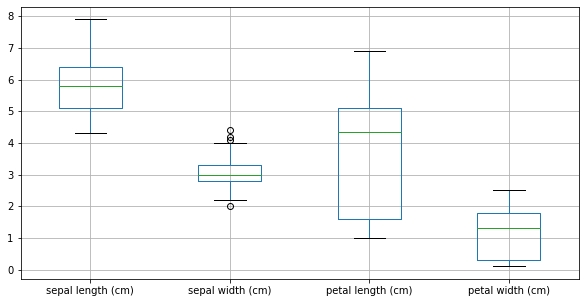

In [8]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [9]:
# some outliers could be seen in 'sepal width (cm)'

### Removing outliers using IQR

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [11]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(146, 4)

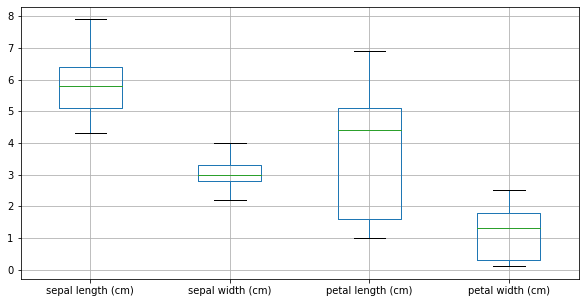

In [12]:
plt.figure(figsize=(10,5))
df1.boxplot()
plt.show()

### Scaling the data

In [13]:
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df1), columns = df1.columns)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,146.00,146.00,146.00,146.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.12,-1.60,-1.48
25%,-0.91,-0.61,-1.26,-1.22
50%,-0.07,-0.10,0.34,0.10
75%,0.65,0.65,0.74,0.77
max,2.46,2.42,1.77,1.69


In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.91,1.16,-1.37,-1.35
1,-1.15,-0.10,-1.37,-1.35
2,-1.39,0.40,-1.43,-1.35
3,-1.51,0.15,-1.32,-1.35
4,-1.03,1.41,-1.37,-1.35


## Finding the optimum number of clusters for k-means classification

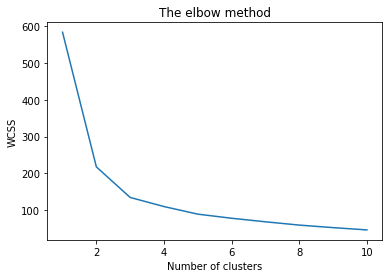

In [15]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [16]:
# We can conclude that the optimal number of clusters are 3

## Applying kmeans to the dataset / Creating the kmeans classifier

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

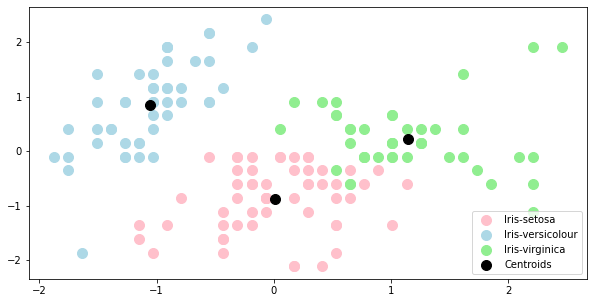

In [18]:
plt.figure(figsize=(10,5))

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'lightblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'lightgreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()